In [1]:
from matplotlib import pyplot as plt
from matplotlib import colors, cm
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import trackpy as tp
from skimage.io import imread
import random as rand
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import math, random

In [2]:
def read_tuple_list(x):
    x_strip = x.strip('()').strip('[]')
    if len(x_strip.split(', ')) == 1:
        return np.array(x_strip.split(), dtype=float)
    else:
        return np.array(x_strip.split(', '), dtype=float)

In [3]:
#Lets import an arcos set, wave data, and the corresponding tracking data...
#base_path = Path('/media/echo/Samsung_T5/Main Data/Analysis Sets/23 Protofigures/Data Sets/2023_01_24_main-set')
base_path = Path('/Volumes/Samsung_T5/Main Data/Analysis Sets/23 Protofigures/Data Sets/2023_01_24_main-set')
images_folder = base_path / 'images'
analysis_output_destination = base_path / 'wavefit_outputs'

image_num = str(88) #57 used, 88 used

wave_df = pd.read_csv(analysis_output_destination / '{}_wave_df.csv'.format(image_num), converters={"wave_centroid": read_tuple_list})
arcos_df = pd.read_csv(analysis_output_destination / '{}_ARCOS_df.csv'.format(image_num))
tracking_df = pd.read_csv(analysis_output_destination / '{}_tracking_binned_df.csv'.format(image_num))

um_per_px = 2.2

In [4]:
#So track IDs and corrresponding tracks are found in tracking df, 
#The corresponding points that made the circle are in arcos df, 
#the waves to analze are in waves df, need to go from 
#WaveDF --> arcosDF --> trackingDF 
#Get centroid and radius over time from waveDF, 
#Get trackID inside wavefront from arcosDF, 
#Get track from tracking, then calc radial movement as enter wavefront? 

In [5]:
raw_tif = imread(images_folder / '{}.tif'.format(image_num))


<AxesSubplot:xlabel='timepoint', ylabel='circle_radius'>

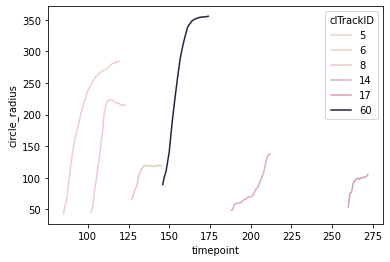

In [6]:
sns.lineplot(data=wave_df, x='timepoint', y='circle_radius', hue='clTrackID')

In [7]:
#Lets select the example wave:
ex_wave_num = 5 #57:6, 88:5
ex_wave_DF = wave_df[wave_df['clTrackID']==ex_wave_num]
ex_arcos_DF = arcos_df[arcos_df['clTrackID']==ex_wave_num]
start_time = ex_wave_DF.timepoint.min()
pre_wave_time = start_time - 12 #one min prior to wave
end_time = ex_wave_DF.timepoint.max()
post_wave_time = end_time + 2 #four min after wave

In [8]:
ex_arcos_DF

,timepoint,track_id,x,y,clTrackID,label,Calcium,area,cell_density,Calcium.bin
281,85,0,207.700000,220.300000,5,3420,804.000000,10,9643.381914,1
282,85,111,187.888889,221.666667,5,2495,1024.666667,9,9643.381914,1
283,85,483,209.125000,228.125000,5,3846,821.625000,8,9643.381914,1
284,85,599,204.000000,246.000000,5,4511,833.000000,9,9643.381914,1
285,85,648,216.900000,228.200000,5,3135,653.000000,10,9643.381914,1
...,...,...,...,...,...,...,...,...,...,...
14826,119,7194,380.000000,252.000000,5,73,567.555556,9,9245.383215,1
14841,119,12135,395.000000,239.666667,5,1406,542.000000,9,9245.383215,1
14846,119,13482,386.200000,220.000000,5,863,755.700000,10,9245.383215,1
14848,119,14755,393.500000,223.500000,5,311,669.857143,14,9245.383215,1


In [10]:
export_location = '/Volumes/Samsung_T5/Main Data/Analysis Sets/23 Protofigures/Supplement 1/ARCOS Stills/{}/'.format(image_num)
vmin_set = 150
vmax_set = 900
crop_buffer = 160 #57:100px, 81:160px,
border_color = '#EF7930'
border_width = 4
ex_time = ex_wave_DF.timepoint.unique()[1] #57:182px, 81:160px,

ex_arcos_timepoint = ex_arcos_DF[ex_arcos_DF['timepoint'] == ex_time]
initial_wave_center = ex_wave_DF[ex_wave_DF['timepoint']==ex_time].wave_centroid.values[0]
initial_wave_center = [int(val) for val in initial_wave_center]
i_wave_r = ex_wave_DF[ex_wave_DF['timepoint']==ex_time].circle_radius.values[0]/um_per_px

point_color = 'magenta'

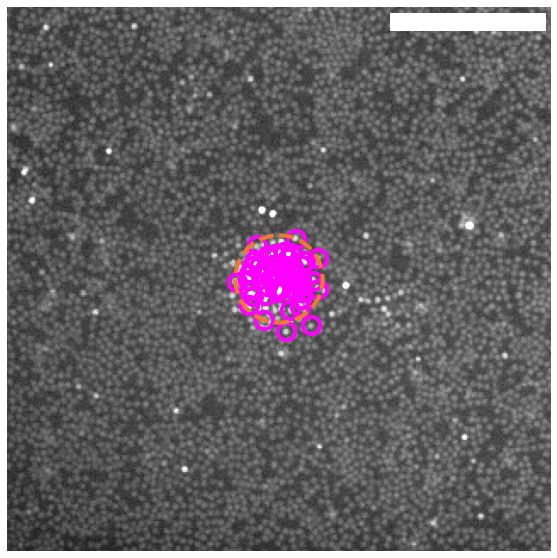

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(raw_tif[ex_time, 0,:,:], cmap='Greys_r', vmin=vmin_set, vmax=vmax_set)
sns.scatterplot(data=ex_arcos_timepoint, x='x', y='y', color=[0,0,0,0], edgecolor=point_color, s=300, linewidth=4, ax=ax)
plt.axis('off')
#Wave Limit Circle: 
circle1 = plt.Circle(initial_wave_center, i_wave_r, color=border_color, fill=False, linestyle='--', linewidth=border_width)
ax.add_patch(circle1)
plt.ylim(initial_wave_center[1]-crop_buffer,initial_wave_center[1]+crop_buffer)
plt.xlim(initial_wave_center[0]-crop_buffer,initial_wave_center[0]+crop_buffer)
plt.gca().invert_yaxis()

scalebar = AnchoredSizeBar(ax.transData,
                           200/um_per_px, '',  'upper right', 
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=10)

ax.add_artist(scalebar)



In [13]:
for t in ex_arcos_DF.timepoint.unique():
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(raw_tif[t, 0,:,:], cmap='Greys_r', vmin=vmin_set, vmax=vmax_set)
    ex_arcos_timepoint = ex_arcos_DF[ex_arcos_DF['timepoint'] == t]
    
    #With circle fit overlay:
    i_wave_center = ex_wave_DF[ex_wave_DF['timepoint']==ex_time].wave_centroid.values[0]
    i_wave_r = ex_wave_DF[ex_wave_DF['timepoint']==t].circle_radius.values[0]/um_per_px
    circle1 = plt.Circle(i_wave_center, i_wave_r, color=border_color, fill=False, linestyle='--', linewidth=border_width)
    ax.add_patch(circle1)

    #sns.scatterplot(data=ex_arcos_timepoint, x='x', y='y', color=[0,0,0,0], edgecolor='magenta', s=100, linewidth=1, ax=ax) #57: 300,4; 88: 100, 1
    plt.axis('off')
    plt.ylim(initial_wave_center[1]-crop_buffer,initial_wave_center[1]+crop_buffer)
    plt.xlim(initial_wave_center[0]-crop_buffer,initial_wave_center[0]+crop_buffer)
    plt.gca().invert_yaxis()
    scalebar = AnchoredSizeBar(ax.transData,
                               100/um_per_px, '',  'upper right', 
                               pad=1,
                               color='white',
                               frameon=False,
                               size_vertical=10)

    ax.add_artist(scalebar)
    plt.savefig(export_location + image_num + '-{}-wcircle.png'.format(t), dpi=500, bbox_inches='tight')
    plt.close(fig)

In [14]:
#Pre wave output: 
pre_wave_time = min(ex_arcos_DF.timepoint.unique()) - 12
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(raw_tif[pre_wave_time, 0,:,:], cmap='Greys_r', vmin=vmin_set, vmax=vmax_set)
ex_arcos_timepoint = ex_arcos_DF[ex_arcos_DF['timepoint'] == pre_wave_time]
sns.scatterplot(data=ex_arcos_timepoint, x='x', y='y', color=[0,0,0,0], edgecolor='magenta', s=300, linewidth=4, ax=ax)
plt.axis('off')
plt.ylim(initial_wave_center[1]-crop_buffer,initial_wave_center[1]+crop_buffer)
plt.xlim(initial_wave_center[0]-crop_buffer,initial_wave_center[0]+crop_buffer)
plt.gca().invert_yaxis()
scalebar = AnchoredSizeBar(ax.transData,
                           100/um_per_px, '',  'upper right', 
                           pad=1,
                           color='white',
                           frameon=False,
                           size_vertical=10)

ax.add_artist(scalebar)
plt.savefig(export_location + image_num + '-{}.png'.format(pre_wave_time), dpi=300, bbox_inches='tight')
plt.close()

In [122]:
track_check

3222

In [95]:
track_check = ex_arcos_DF.track_id.unique()[200]
calcium_track = tracking_df[tracking_df.track_id == track_check].Calcium
calcium_bin_track = tracking_df[tracking_df.track_id == track_check]['Calcium.bin']
track_time = tracking_df[tracking_df.track_id == track_check].timepoint*5.0 - ex_arcos_DF.timepoint.unique()[0]*5.0


In [106]:
relevant_track = tracking_df[tracking_df.track_id == track_check]
bin_times = relevant_track[relevant_track['Calcium.bin']>0].timepoint*5.0 - ex_arcos_DF.timepoint.unique()[0]*5.0
bin_cals = relevant_track[relevant_track['Calcium.bin']>0].Calcium

In [111]:
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2, 'font.family': ['arial'], 'axes.linewidth':2})

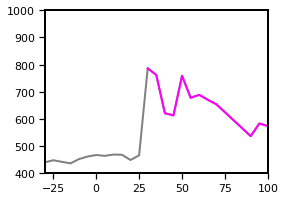

In [121]:
plt.figure(figsize=(4,3))
plt.plot(track_time, calcium_track, 'grey')
plt.plot(bin_times[3:], bin_cals[3:], 'magenta')
plt.xlim(-30, 100)
plt.ylim(400,1000)
plt.savefig('supp-fig1_calcium-bin-signal.png', dpi=300)

In [131]:

fig, ax = plt.subplots(figsize=(10,10))
t=189
ax.imshow(raw_tif[t, 0,:,:], cmap='Greys_r', vmin=vmin_set, vmax=vmax_set)
ex_arcos_timepoint = ex_arcos_DF[ex_arcos_DF['timepoint'] == t]

#With circle fit overlay:
i_wave_r = ex_wave_DF[ex_wave_DF['timepoint']==t].circle_radius.values[0]/um_per_px
#circle1 = plt.Circle(i_wave_center, i_wave_r, color=border_color, fill=False, linestyle='--', linewidth=border_width)
#ax.add_patch(circle1)

sns.scatterplot(data=ex_arcos_timepoint, x='x', y='y', color=[0,0,0,0], edgecolor='magenta', s=300, linewidth=4, ax=ax)
sns.scatterplot(data=ex_arcos_timepoint[ex_arcos_timepoint['track_id']==track_check], x='x', y='y', color=[0,0,0,0], edgecolor='lightgreen', s=600, linewidth=8, ax=ax)
plt.axis('off')
plt.ylim(i_wave_center[1]-crop_buffer,i_wave_center[1]+crop_buffer)
plt.xlim(i_wave_center[0]-crop_buffer,i_wave_center[0]+crop_buffer)
plt.gca().invert_yaxis()
scalebar = AnchoredSizeBar(ax.transData,
                           100/um_per_px, '',  'upper right', 
                           pad=1,
                           color='white',
                           frameon=False,
                           size_vertical=10)

ax.add_artist(scalebar)
plt.savefig(export_location + image_num + '-{}.png'.format(t), dpi=500, bbox_inches='tight')
plt.close(fig)



In [9]:
#Explaining the circle fitting supplement:
#Need a few functions from Step 4 of analysis pipeline:

#------------------------------------------------------------------------------------------------------------------------
#Min circle fitting method:
# Smallest enclosing circle - Library (Python)
# 
# Copyright (c) 2020 Project Nayuki
# https://www.nayuki.io/page/smallest-enclosing-circle
# Data conventions: A point is a pair of floats (x, y). A circle is a triple of floats (center x, center y, radius).
# Returns the smallest circle that encloses all the given points. Runs in expected O(n) time, randomized.
# Input: A sequence of pairs of floats or ints, e.g. [(0,5), (3.1,-2.7)].
# Output: A triple of floats representing a circle.
# Note: If 0 points are given, None is returned. If 1 point is given, a circle of radius 0 is returned.
# 
# Initially: No boundary points known

def make_circle(points):
	# Convert to float and randomize order
	shuffled = [(float(x), float(y)) for (x, y) in points]
	random.shuffle(shuffled)
	
	# Progressively add points to circle or recompute circle
	c = None
	for (i, p) in enumerate(shuffled):
		if c is None or not is_in_circle(c, p):
			c = _make_circle_one_point(shuffled[ : i + 1], p)
	return c

# One boundary point known
def _make_circle_one_point(points, p):
	c = (p[0], p[1], 0.0)
	for (i, q) in enumerate(points):
		if not is_in_circle(c, q):
			if c[2] == 0.0:
				c = make_diameter(p, q)
			else:
				c = _make_circle_two_points(points[ : i + 1], p, q)
	return c

# Two boundary points known
def _make_circle_two_points(points, p, q):
	circ = make_diameter(p, q)
	left  = None
	right = None
	px, py = p
	qx, qy = q
	
	# For each point not in the two-point circle
	for r in points:
		if is_in_circle(circ, r):
			continue
		
		# Form a circumcircle and classify it on left or right side
		cross = _cross_product(px, py, qx, qy, r[0], r[1])
		c = make_circumcircle(p, q, r)
		if c is None:
			continue
		elif cross > 0.0 and (left is None or _cross_product(px, py, qx, qy, c[0], c[1]) > _cross_product(px, py, qx, qy, left[0], left[1])):
			left = c
		elif cross < 0.0 and (right is None or _cross_product(px, py, qx, qy, c[0], c[1]) < _cross_product(px, py, qx, qy, right[0], right[1])):
			right = c
	
	# Select which circle to return
	if left is None and right is None:
		return circ
	elif left is None:
		return right
	elif right is None:
		return left
	else:
		return left if (left[2] <= right[2]) else right

def make_diameter(a, b):
	cx = (a[0] + b[0]) / 2
	cy = (a[1] + b[1]) / 2
	r0 = math.hypot(cx - a[0], cy - a[1])
	r1 = math.hypot(cx - b[0], cy - b[1])
	return (cx, cy, max(r0, r1))

def make_circumcircle(a, b, c):
	# Mathematical algorithm from Wikipedia: Circumscribed circle
	ox = (min(a[0], b[0], c[0]) + max(a[0], b[0], c[0])) / 2
	oy = (min(a[1], b[1], c[1]) + max(a[1], b[1], c[1])) / 2
	ax = a[0] - ox;  ay = a[1] - oy
	bx = b[0] - ox;  by = b[1] - oy
	cx = c[0] - ox;  cy = c[1] - oy
	d = (ax * (by - cy) + bx * (cy - ay) + cx * (ay - by)) * 2.0
	if d == 0.0:
		return None
	x = ox + ((ax*ax + ay*ay) * (by - cy) + (bx*bx + by*by) * (cy - ay) + (cx*cx + cy*cy) * (ay - by)) / d
	y = oy + ((ax*ax + ay*ay) * (cx - bx) + (bx*bx + by*by) * (ax - cx) + (cx*cx + cy*cy) * (bx - ax)) / d
	ra = math.hypot(x - a[0], y - a[1])
	rb = math.hypot(x - b[0], y - b[1])
	rc = math.hypot(x - c[0], y - c[1])
	return (x, y, max(ra, rb, rc))

_MULTIPLICATIVE_EPSILON = 1 + 1e-14

def is_in_circle(c, p):
	return c is not None and math.hypot(p[0] - c[0], p[1] - c[1]) <= c[2] * _MULTIPLICATIVE_EPSILON

# Returns twice the signed area of the triangle defined by (x0, y0), (x1, y1), (x2, y2).
def _cross_product(x0, y0, x1, y1, x2, y2):
	return (x1 - x0) * (y2 - y0) - (y1 - y0) * (x2 - x0)

#------------------------------------------------------------------------------------------------------------------------
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

def percent_circle_fit(xs,ys, percentage):
    x_trans = xs - np.mean(xs)
    y_trans = ys - np.mean(ys)
    centroid = (np.mean(xs), np.mean(ys))
    points = np.array([[xi,yi] for xi,yi in zip(x_trans,y_trans)])
    radial_points = np.array([cart2pol(xi,yi) for xi,yi in zip(x_trans,y_trans)])

    radial_thresh = np.percentile(radial_points[:,0],percentage)
    inner_pts = []

    for i in range(len(radial_points)):
        if radial_points[i][0] <= radial_thresh:
            inner_pts.append(radial_points[i])
    inner_pts = np.array(inner_pts)

    points_retreive = np.array([pol2cart(point[0], point[1]) for point in inner_pts])
    
    x,y,r = make_circle(points_retreive)
    
    return (x+centroid[0],y+centroid[1]), r

In [10]:

wave = ex_arcos_DF
timepts = wave.timepoint.unique()

pts = []
r_coll = []
center_fit_coll = []

#IMPROVEMENTNOTE: 
#This section here could be used in a multithreading context, this would speed up frame circle fitting.

for i in timepts:
    
    x = wave.loc[wave['timepoint']<=i].x.values
    y = wave.loc[wave['timepoint']<=i].y.values

    center, r = percent_circle_fit(x,y,95)
    circle1 = plt.Circle(center, r, color='r', fill=False)

    #circle1 = plt.Circle(centroid, r_fit, color='r', fill=False)
    x_trans = x - center[0]
    y_trans = y - center[1]
    pts.append(np.array([cart2pol(xi,yi) for xi,yi in zip(x_trans,y_trans)])[:,0]*um_per_px)
    center_fit_coll.append(center)
    r_coll.append(r*um_per_px)
            


In [12]:
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2, 'font.family': ['arial'], 'axes.linewidth':2})

86


(0.0, 250.0)

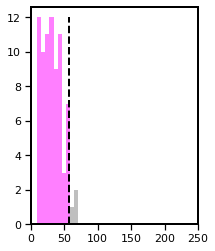

In [45]:
#Expand on this to help explain how circle fit works: 

#Show how points are collected and distance to the centroid is measured, 95% excluded
time_i = 1

fig, ax = plt.subplots(figsize=(3,4))
print(timepts[time_i])
N, bins, patches = plt.hist(pts[time_i], alpha=0.5, color='magenta')

# Random facecolor for each bar
for i in range(len(N)):
    if bins[i] > r_coll[time_i]:
        patches[i].set_facecolor('grey')
    else:
        patches[i].set_facecolor('magenta')

plt.vlines(r_coll[time_i], ymin=0, ymax=12, colors='black', linestyles='dashed')
plt.xlim(0,250)


In [73]:
#Expand on this to help explain how circle fit works: 
export_location_hist = '/Volumes/Samsung_T5/Main Data/Analysis Sets/23 Protofigures/Supplement 1/Exclusion_hists/88/'

for time_i in range(len(timepts)): 
    fig, ax = plt.subplots(figsize=(3,4))
    N, bins, patches = plt.hist(pts[time_i], bins=int(np.sqrt(len(pts[time_i]))+1), alpha=0.5, color='magenta')

    # Random facecolor for each bar
    heights = []
    for i in range(len(N)):
        if bins[i] > r_coll[time_i]:
            patches[i].set_facecolor('grey')
            heights.append(patches[i].get_height())
        else:
            patches[i].set_facecolor('magenta')
            heights.append(patches[i].get_height())

    plt.vlines(r_coll[time_i], ymin=0, ymax=max(heights), colors='black', linestyles='dashed')
    plt.xlim(0,350)
    plt.savefig(export_location_hist + image_num + '-{}.png'.format(timepts[time_i]), dpi=300, bbox_inches='tight')
    plt.close(fig)